In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import hddm
import numpy as np
print(hddm.__version__)
print(np.version.version)

 0.6.0
1.11.3


/Users/james/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [4]:
data = hddm.load_csv('./Combined_Scanner_ITC.csv')

#max RT is 5 so anything bigger than this is a no answer trial
data = data[data.rt < 6]

#get rid of 101 since he sucks in general
data = data[data.subj_idx != 101]

data2 = data[data.Condition == 1]

# Run the actual models

In [7]:
#include Bias and intertrial variability
AV_day_bias = hddm.HDDM(data2, depends_on={'a': 'Day', 'v': 'Day'},bias=True)
AV_day_bias.sample(20000, burn=2500, thin=5, dbname='AV_day_bias.db', db='pickle')

/Users/james/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 20000 of 20000 complete in 837.1 sec

In [10]:
V_day_bias = hddm.HDDM(data2, depends_on={'v': 'Day'},bias=True)
V_day_bias.sample(20000, burn=2500, thin=5, dbname='V_day_bias.db', db='pickle')

 [-----------------100%-----------------] 20001 of 20000 complete in 1503.6 sec

In [11]:
A_day_bias = hddm.HDDM(data2, depends_on={'a': 'Day'},bias=True)
A_day_bias.sample(20000, burn=2500, thin=5, dbname='A_day_bias.db', db='pickle')

 [-----------------100%-----------------] 20000 of 20000 complete in 794.0 sec

In [12]:
Null_model = hddm.HDDM(data2)
Null_model.sample(20000, burn=2500, thin=5, dbname='Null_model.db', db='pickle')

 [-----------------100%-----------------] 20000 of 20000 complete in 515.3 sec

In [30]:
Null_w_bias = hddm.HDDM(data2, bias=True)
Null_w_bias.sample(20000, burn=2500, thin=5, dbname='Null_w_bias.db', db='pickle')

 [-----------------100%-----------------] 20000 of 20000 complete in 687.2 sec

In [13]:
AT_day_bias = hddm.HDDM(data2, depends_on={'a': 'Day', 't': 'Day'},bias=True)
AT_day_bias.sample(20000, burn=2500, thin=5, dbname='AT_day_bias.db', db='pickle')

 [-----------------100%-----------------] 20000 of 20000 complete in 953.8 sec

In [14]:
T_day_bias = hddm.HDDM(data2, depends_on={'t': 'Day'},bias=True)
T_day_bias.sample(20000, burn=2500, thin=5, dbname='T_day_bias.db', db='pickle')

 [-----------------100%-----------------] 20000 of 20000 complete in 913.6 sec

In [15]:
VT_day_bias = hddm.HDDM(data2, depends_on={'v': 'Day', 't': 'Day'},bias=True)
VT_day_bias.sample(20000, burn=2500, thin=5, dbname='VT_day_bias.db', db='pickle')

 [-----------------100%-----------------] 20000 of 20000 complete in 2261.2 sec

In [16]:
AVT_day_bias = hddm.HDDM(data2, depends_on={'a': 'Day', 'v': 'Day', 't': 'Day'},bias=True)
AVT_day_bias.sample(20000, burn=2500, thin=5, dbname='AVT_day_bias.db', db='pickle')

 [-----------------100%-----------------] 20000 of 20000 complete in 1030.4 sec

In [17]:
AT_day = hddm.HDDM(data2, depends_on={'a': 'Day', 't': 'Day'})
AT_day.sample(20000, burn=2500, thin=5, dbname='AT_day.db', db='pickle')

 [-----------------100%-----------------] 20000 of 20000 complete in 1157.4 sec

# Save and load the models

In [19]:
AV_day_bias.save('AV_day_bias')
V_day_bias.save('V_day_bias')
A_day_bias.save('A_day_bias')
Null_model.save('Null_model')
Null_w_bias.save('Null_w_bias')
AT_day_bias.save('AT_day_bias')
T_day_bias.save('T_day_bias')
VT_day_bias.save('VT_day_bias')
AVT_day_bias.save('AVT_day_bias')
AT_day.save('AT_day')


In [5]:
AV_day_bias = hddm.load('AV_day_bias')
V_day_bias = hddm.load('V_day_bias')
A_day_bias = hddm.load('A_day_bias')
Null_model = hddm.load('Null_model')
Null_w_bias = hdd.load('Null_w_bias')
AT_day_bias = hddm.load('AT_day_bias')
T_day_bias = hddm.load('T_day_bias')
VT_day_bias = hddm.load('VT_day_bias')
AVT_day_bias = hddm.load('AVT_day_bias')
AT_day = hddm.load('AT_day')


# Print out model stats

In [31]:
AV_day_bias.print_stats()
#DIC: 13904.257469
V_day_bias.print_stats()
#DIC: 14010.415093
A_day_bias.print_stats()
#DIC: 13887.340676
Null_model.print_stats()
#DIC: 14092.827220
Null_w_bias.print_stats()
#DIC: 13995.348032
AT_day_bias.print_stats()#WINNING MODEL BASED ON DIC
#DIC: 13650.176102
T_day_bias.print_stats()#BRONZE MEDAL, GOING TO FOLLOW UP WITH THIS ONE AS WELL
#DIC: 13692.992212
VT_day_bias.print_stats()
#DIC: 13705.576590
AVT_day_bias.print_stats()#SECOND PLACE MODEL BASED ON DIC
#DIC: 13666.399618

                       mean         std       2.5q        25q        50q        75q       97.5q       mc err
a(Fast)             2.13048   0.0893349    1.95576    2.07132    2.12966    2.18738     2.30893   0.00159749
a(Fed)              2.25107   0.0899391    2.07644    2.19174    2.25067    2.30951     2.43395   0.00138097
a_std              0.378706   0.0506122   0.294012   0.342923   0.374104     0.4088    0.490426  0.000761176
a_subj(Fast).102    2.19734   0.0869084    2.03515     2.1377    2.19452    2.25562     2.37348     0.001321
a_subj(Fast).103    1.67582   0.0662795    1.55555    1.63134    1.67154    1.71854     1.81896   0.00103833
a_subj(Fast).104    2.18272   0.0796848    2.03518    2.12562    2.18157    2.23553      2.3463   0.00123439
a_subj(Fast).106    1.37616   0.0567038    1.26918    1.33764      1.375    1.41414     1.49205  0.000860594
a_subj(Fast).107     2.0619   0.0789912    1.91293     2.0094    2.06007     2.1137     2.22239   0.00138216
a_subj(Fast).108   

                      mean         std       2.5q        25q        50q        75q        97.5q       mc err
a                  2.20145     0.08537    2.03079    2.14678    2.19949    2.25611      2.37244   0.00140956
a_std             0.363207   0.0716475   0.252677    0.31137   0.353171   0.403946     0.533234    0.0013258
a_subj.102         2.27471   0.0648973    2.15243     2.2291    2.27395    2.31816      2.40546   0.00107385
a_subj.103         2.08085    0.060783    1.96885    2.03847    2.07951    2.12096      2.20335   0.00100597
a_subj.104         2.17669    0.062369    2.05744    2.13392    2.17601    2.21766      2.30438   0.00102365
a_subj.106         1.44783    0.043829    1.36472     1.4177    1.44695    1.47763      1.53464  0.000730003
a_subj.107         2.31168    0.067088    2.18802    2.26593    2.30758    2.35475      2.45217   0.00112885
a_subj.108          1.9062   0.0567402    1.79745    1.86692    1.90507     1.9441      2.01896  0.000958346
a_subj.109         

                       mean         std       2.5q        25q        50q        75q       97.5q       mc err
a(Fast)             2.13024   0.0886625    1.96095    2.07212    2.12752    2.18734     2.31468   0.00163596
a(Fed)              2.25587    0.087887    2.08555    2.19692    2.25639    2.31349     2.43017   0.00152116
a_std              0.376457   0.0511587   0.291293   0.341354   0.371476   0.405958    0.492544  0.000853471
a_subj(Fast).102    2.19345   0.0862393    2.03104    2.13477    2.19189    2.24781      2.3724   0.00146681
a_subj(Fast).103    1.67482   0.0686465     1.5459    1.62691    1.67354    1.71886     1.81721   0.00112599
a_subj(Fast).104    2.18323   0.0814627    2.03082    2.12767    2.18123    2.23698     2.34687   0.00119787
a_subj(Fast).106    1.37799   0.0557385    1.27356    1.34112    1.37665      1.413     1.49489   0.00090929
a_subj(Fast).107    2.05664   0.0791102    1.90441    2.00356    2.05425    2.10963     2.21348   0.00128874
a_subj(Fast).108   

                 mean         std       2.5q        25q        50q        75q       97.5q       mc err
a             2.20331   0.0895998    2.03216    2.14583    2.20093    2.25842     2.38879   0.00174205
a_std        0.366962   0.0724953   0.255758   0.316215   0.355538   0.406112    0.538466   0.00118083
a_subj.102    2.27315   0.0674076    2.14261    2.22721    2.27169    2.31934     2.40812   0.00119764
a_subj.103    2.08273    0.062272    1.96543    2.03997    2.08268    2.12371     2.20918   0.00119443
a_subj.104    2.17639   0.0608493     2.0594    2.13436     2.1768    2.21653     2.29683   0.00100905
a_subj.106    1.44791   0.0434841    1.36543    1.41913    1.44659    1.47617     1.53747  0.000740207
a_subj.107    2.30682   0.0666623    2.18174     2.2619    2.30528    2.35335     2.44474   0.00109331
a_subj.108    1.90664   0.0566046    1.79872    1.86833    1.90582    1.94278     2.02487   0.00102458
a_subj.109    1.90886   0.0574643    1.80108    1.86938    1.90819     1.

                       mean         std       2.5q        25q        50q         75q       97.5q       mc err
a(Fast)             2.10213   0.0766688    1.95475    2.05185    2.10102     2.15424     2.25281   0.00147371
a(Fed)              2.16137   0.0774353    2.01005    2.11001    2.16042     2.21217     2.31383   0.00131991
a_std               0.32568   0.0434983   0.254561   0.294519   0.321554    0.351727    0.425088  0.000791462
a_subj(Fast).102    2.20072   0.0896203    2.03137    2.14062    2.19894     2.25914     2.38336   0.00146748
a_subj(Fast).103    1.72199   0.0726413    1.58647    1.67167    1.71869     1.76844     1.87402   0.00105139
a_subj(Fast).104    2.17049    0.087201    2.00694    2.11308    2.16849     2.22583     2.35109    0.0015489
a_subj(Fast).106    1.41834   0.0623569    1.30375    1.37428     1.4163     1.45882     1.54478   0.00110964
a_subj(Fast).107    2.07365   0.0841328    1.91817    2.01549    2.07102     2.13048     2.24492   0.00164654
a_subj(Fas

                       mean         std       2.5q        25q        50q        75q       97.5q       mc err
a                   2.13615   0.0753673    1.99399    2.08504    2.13443    2.18228     2.29391   0.00117037
a_std               0.31663   0.0608961   0.223267   0.273137    0.30857   0.352641    0.460031   0.00103459
a_subj.102          2.26754   0.0657981    2.14332    2.22236    2.26456    2.31197      2.3992   0.00115217
a_subj.103          1.93681    0.059725    1.82477     1.8956    1.93442    1.97683     2.05713  0.000957437
a_subj.104          2.17173   0.0633236    2.05252     2.1285    2.16874    2.21388     2.29961   0.00116881
a_subj.106          1.41587   0.0431137    1.33525    1.38635    1.41451    1.44438     1.50191   0.00069753
a_subj.107          2.31099   0.0664374    2.18499    2.26638    2.31025    2.35376     2.44791   0.00119547
a_subj.108          1.87189   0.0561742     1.7667    1.83298    1.87054    1.90991     1.98752  0.000931327
a_subj.109         

                       mean         std       2.5q        25q        50q        75q       97.5q       mc err
a                   2.13809   0.0761021    1.99231    2.08852    2.13745    2.18545     2.29557   0.00118326
a_std              0.318072   0.0619516   0.221338   0.274547   0.309872   0.351846    0.457524   0.00112427
a_subj.102          2.26921   0.0664343    2.14467    2.22261    2.26837    2.31318     2.40472   0.00108859
a_subj.103          1.93542   0.0582454    1.82795    1.89606    1.93391    1.97453     2.04964   0.00106813
a_subj.104          2.17519   0.0625173    2.05626    2.13124    2.17302    2.21755     2.30125   0.00104729
a_subj.106          1.41385       0.043    1.33331    1.38475     1.4135    1.44175     1.50225  0.000803578
a_subj.107          2.31428   0.0666681    2.18871    2.27008    2.31161     2.3582     2.44868   0.00101714
a_subj.108          1.87307   0.0561892    1.76633    1.83444    1.87122    1.91072     1.98848  0.000915422
a_subj.109         

                      mean         std       2.5q        25q       50q        75q        97.5q       mc err
a(Fast)            2.09898   0.0765125    1.94749    2.04755   2.09962    2.14837      2.25299   0.00133188
a(Fed)             2.16077   0.0784575    2.00614    2.10883   2.16184    2.21343       2.3128   0.00130467
a_std             0.325341    0.044063   0.251087   0.293673  0.321466   0.351883     0.424263  0.000750984
a_subj(Fast).102   2.20247   0.0907859    2.03788    2.14051   2.19803    2.26171      2.39267   0.00123212
a_subj(Fast).103   1.71877   0.0718832    1.58118    1.66934   1.71642    1.76746       1.8638   0.00114741
a_subj(Fast).104   2.17264   0.0881966    2.00694    2.11184   2.16867    2.23104      2.35326   0.00147558
a_subj(Fast).106    1.4175   0.0599035    1.30745    1.37639   1.41481    1.45538      1.54538  0.000999518
a_subj(Fast).107    2.0789   0.0841444    1.91601     2.0218     2.078    2.13529      2.25089   0.00150506
a_subj(Fast).108   1.81098  

# Further examine 3 best models

Plotting a(Fast)
Plotting a(Fed)
Plotting a_std
Plotting v
Plotting v_std
Plotting t(Fast)
Plotting t(Fed)
Plotting t_std
Plotting z
Plotting z_std
Plotting a(Fast)
Plotting a(Fed)
Plotting a_std
Plotting v(Fast)
Plotting v(Fed)
Plotting v_std
Plotting t(Fast)
Plotting t(Fed)
Plotting t_std
Plotting z
Plotting z_std
Plotting a


/Users/james/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting a_std
Plotting v
Plotting v_std
Plotting t(Fast)
Plotting t(Fed)
Plotting t_std
Plotting z
Plotting z_std


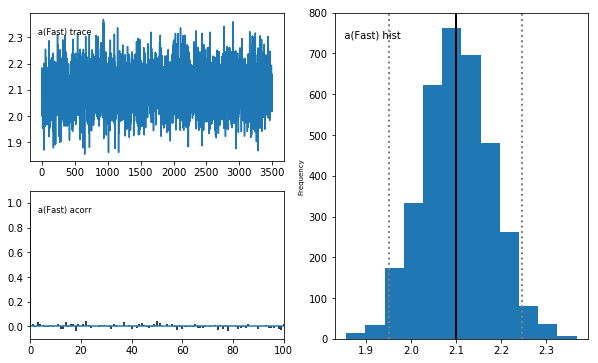

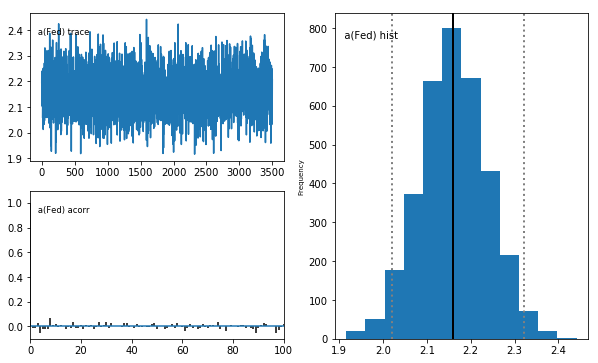

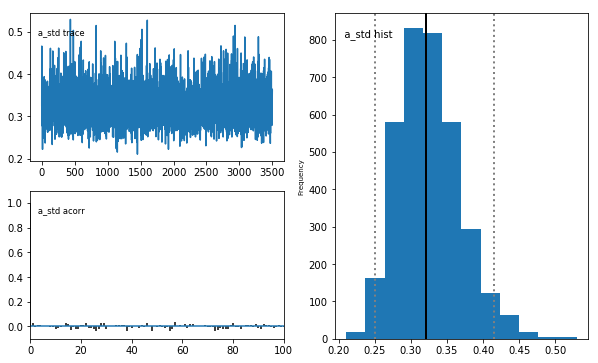

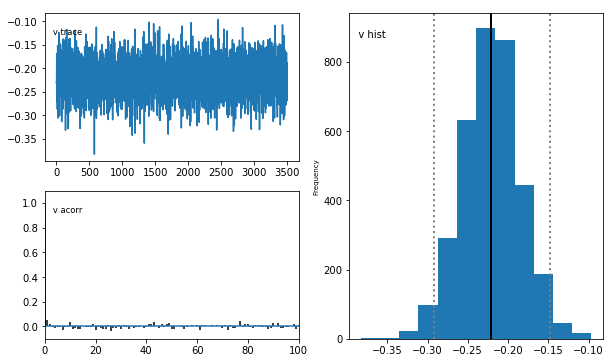

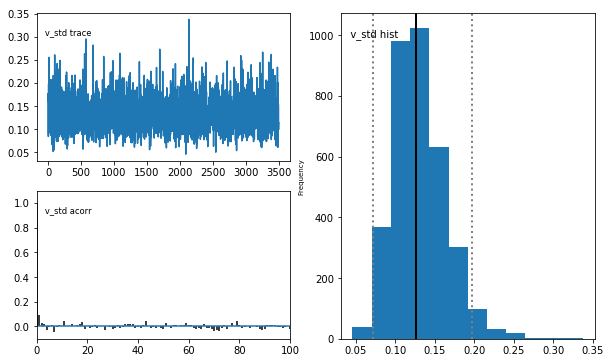

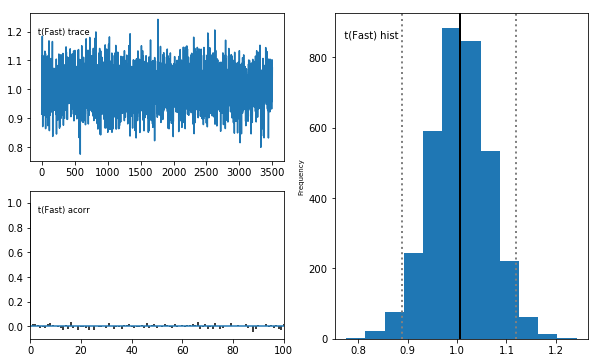

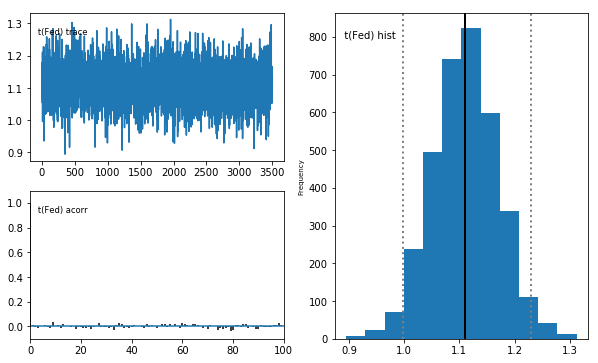

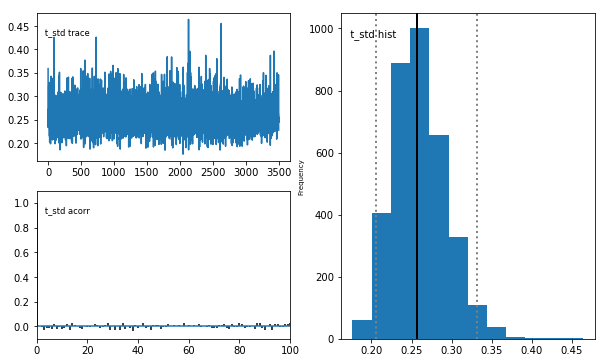

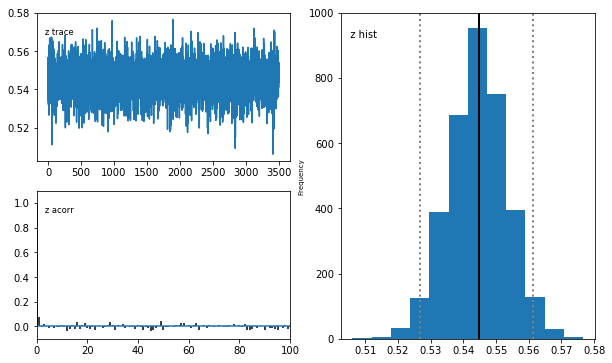

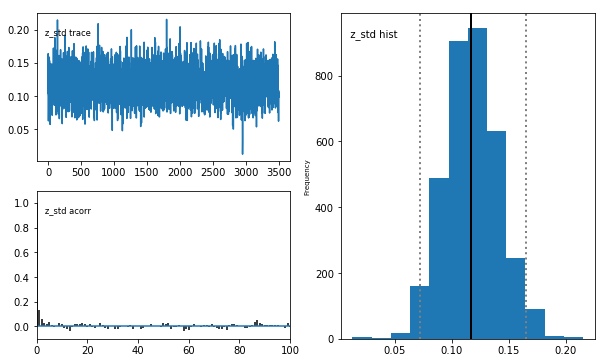

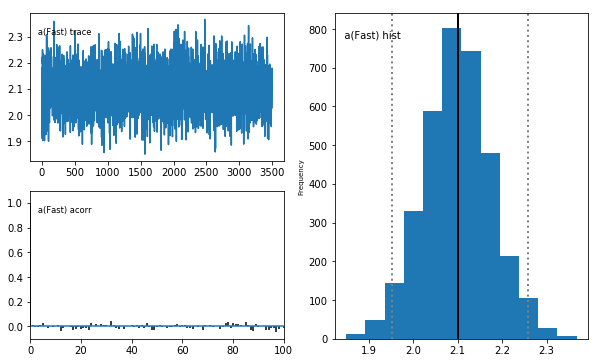

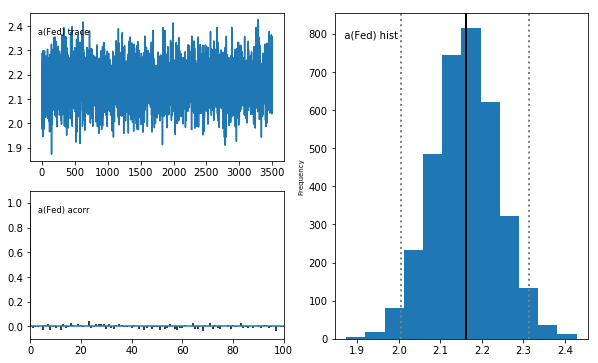

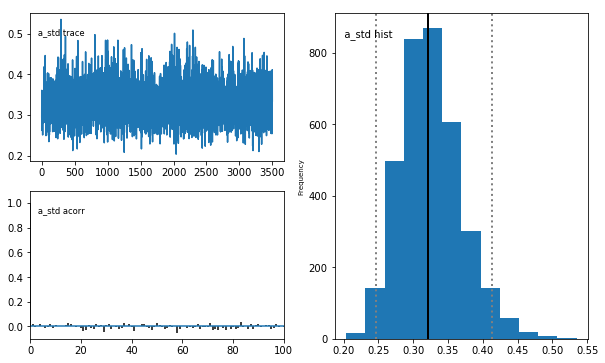

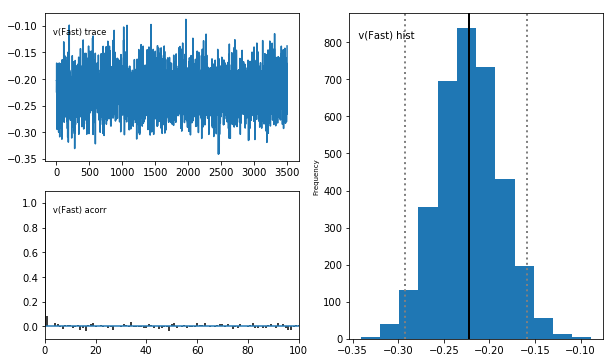

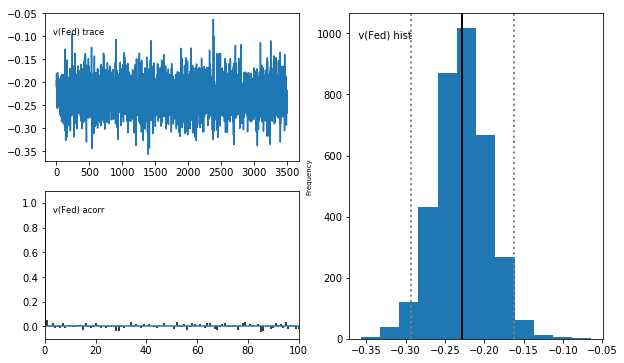

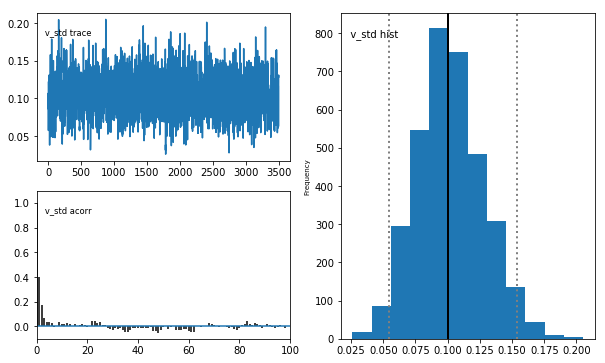

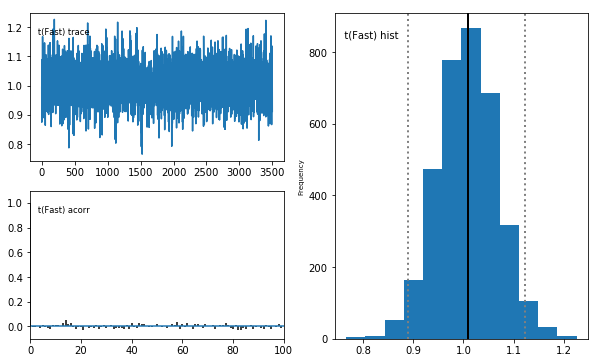

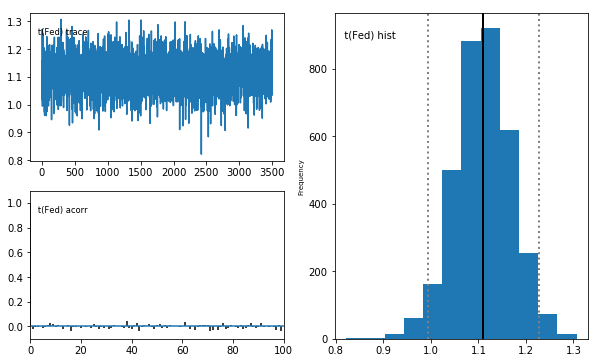

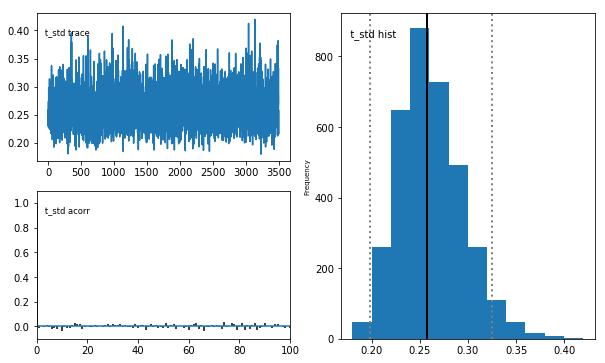

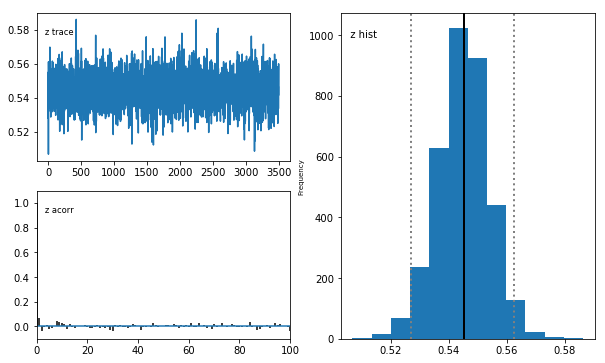

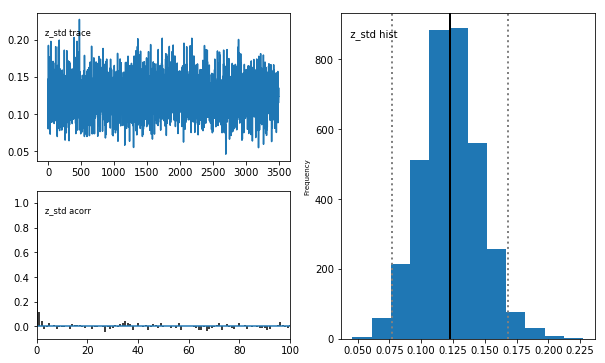

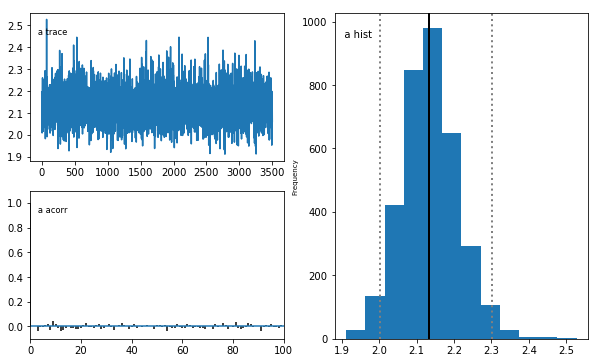

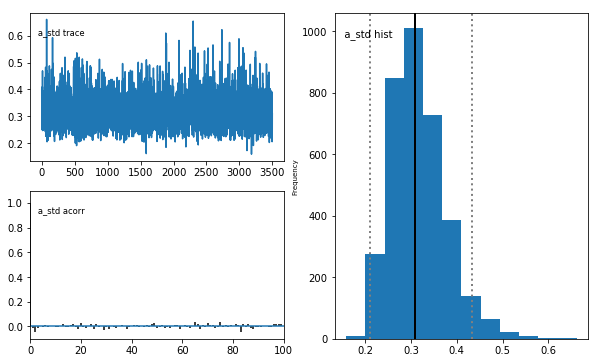

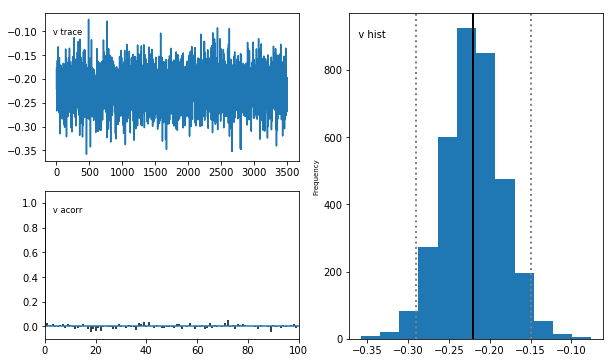

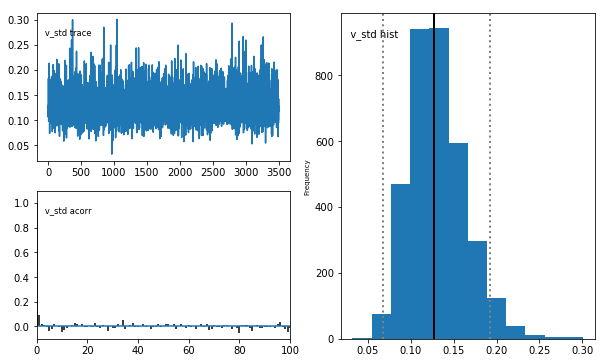

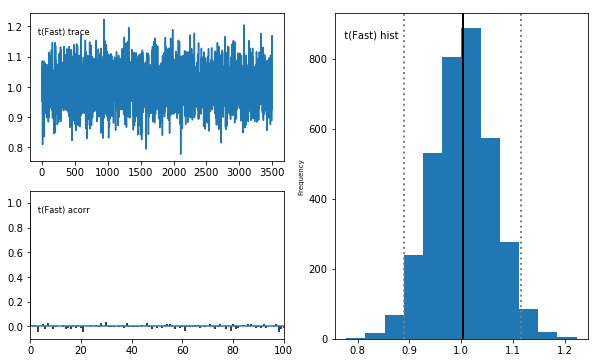

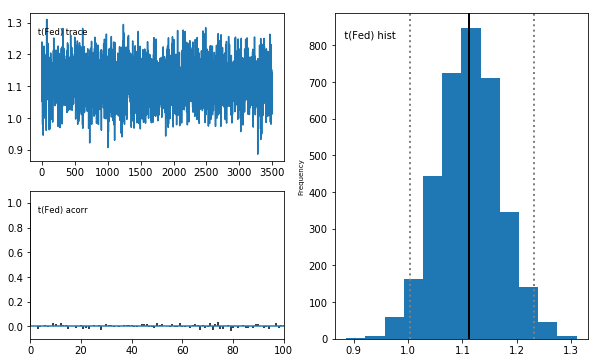

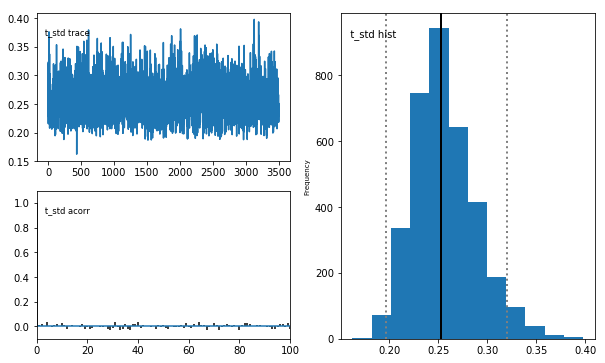

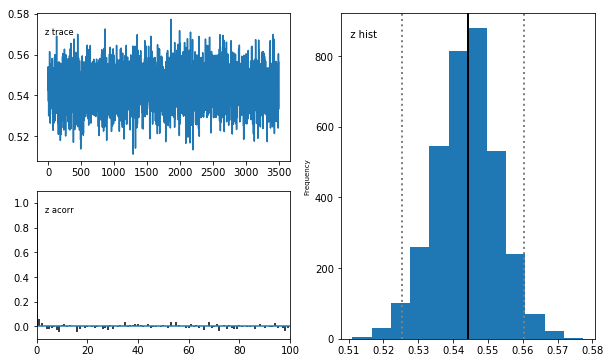

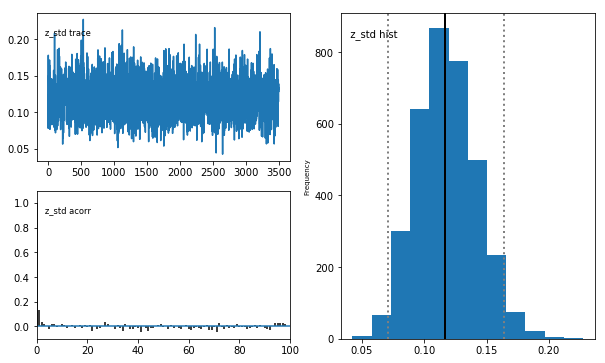

In [7]:
AT_day_bias.plot_posteriors()
AVT_day_bias.plot_posteriors()
T_day_bias.plot_posteriors()

Plotting a(Fast)
Plotting a(Fed)
Plotting a_std
Plotting v
Plotting v_std
Plotting t(Fast)
Plotting t(Fed)
Plotting t_std
Plotting z
Plotting z_std


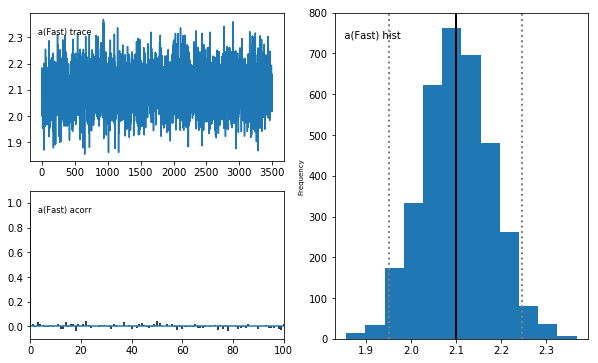

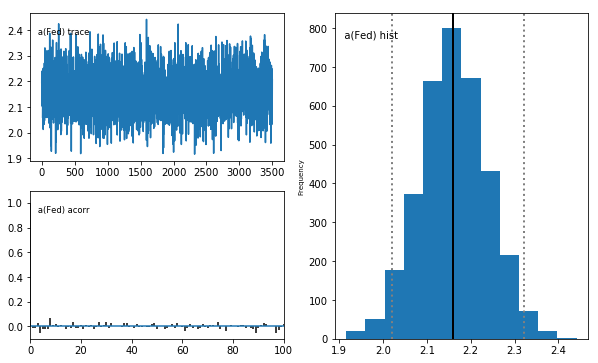

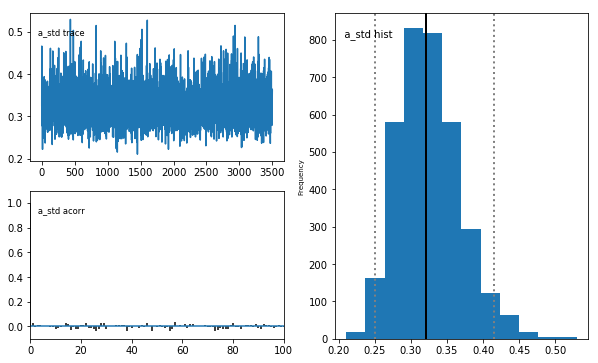

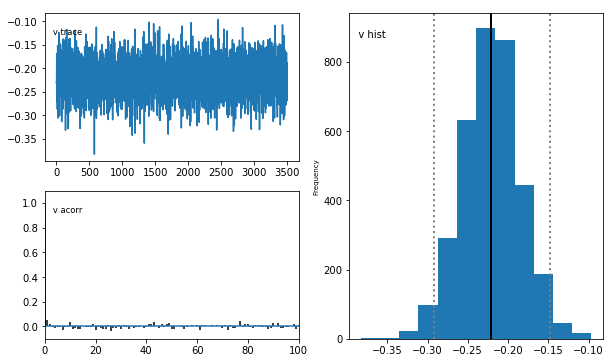

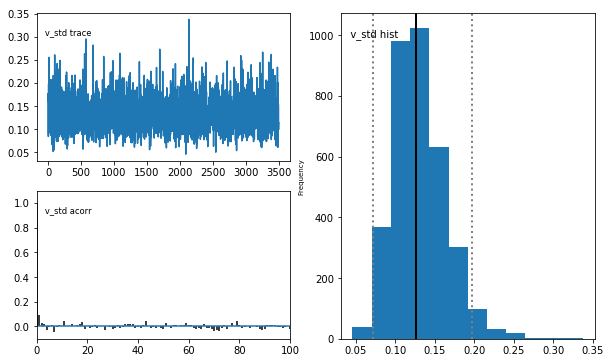

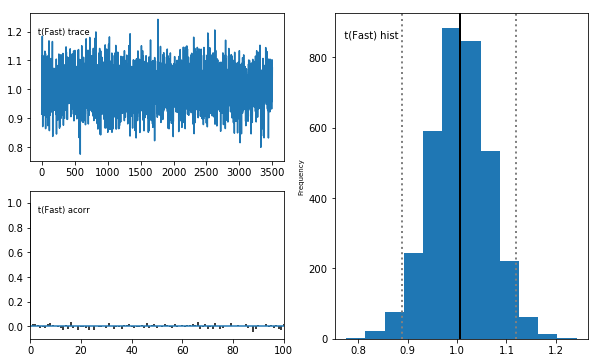

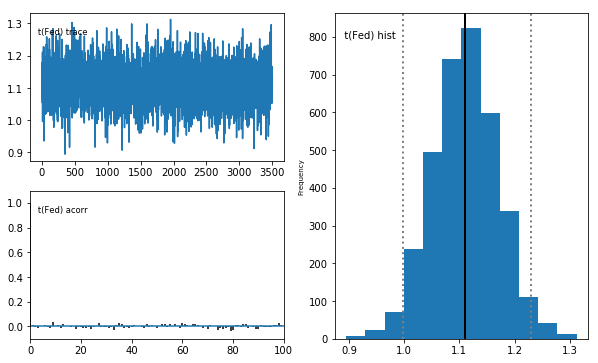

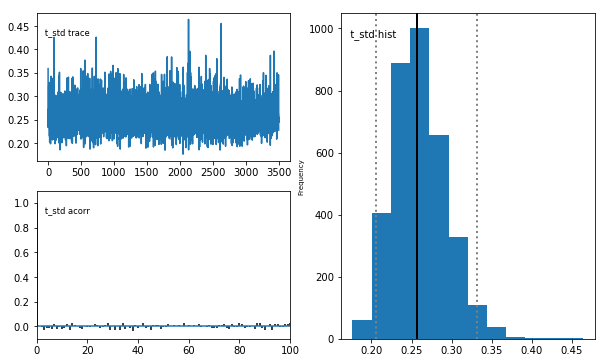

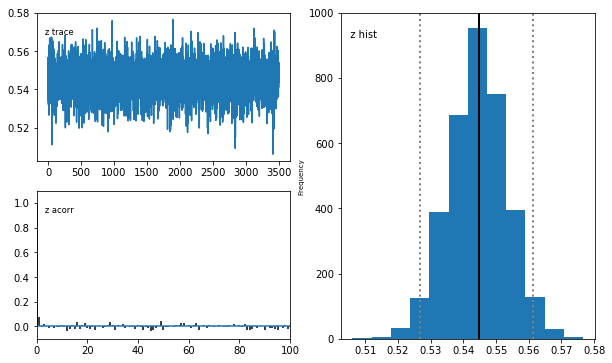

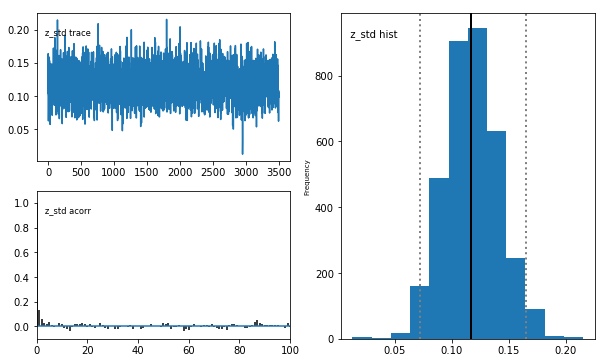

In [34]:
#print out posteriors for the winning model as a pdf
AT_day_bias.plot_posteriors(save=True)


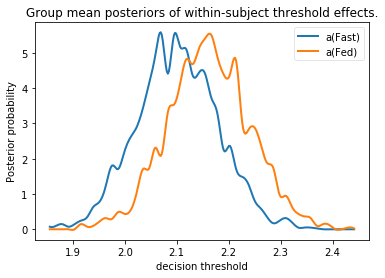

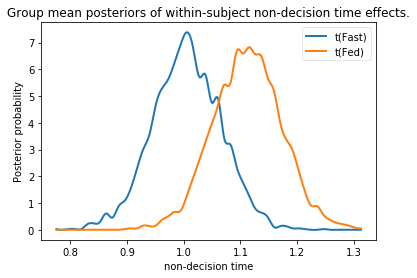

In [25]:
AT_day_bias_a_Fast, AT_day_bias_a_Fed, AT_day_bias_t_Fast, AT_day_bias_t_Fed = AT_day_bias.nodes_db.node[["a(Fast)", "a(Fed)", "t(Fast)", "t(Fed)"]]
hddm.analyze.plot_posterior_nodes([AT_day_bias_a_Fast, AT_day_bias_a_Fed])
plt.xlabel('decision threshold')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject threshold effects.')
plt.savefig('AT_hddm_Threshold_Drink_Diff.pdf')

hddm.analyze.plot_posterior_nodes([AT_day_bias_t_Fast, AT_day_bias_t_Fed])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject non-decision time effects.')
plt.savefig('AT_hddm_NonDec_Drink_Diff.pdf')            

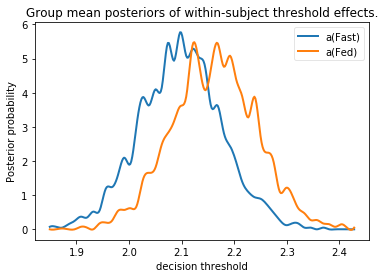

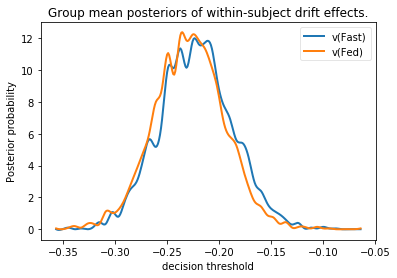

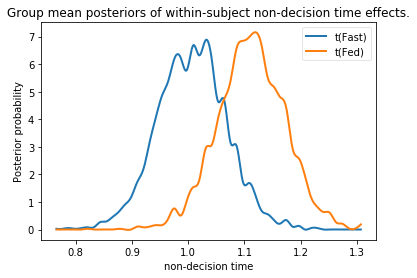

In [26]:
AVT_day_bias_a_Fast, AVT_day_bias_a_Fed, AVT_day_bias_v_Fast, AVT_day_bias_v_Fed, AVT_day_bias_t_Fast, AVT_day_bias_t_Fed = AVT_day_bias.nodes_db.node[["a(Fast)", "a(Fed)", "v(Fast)", "v(Fed)", "t(Fast)", "t(Fed)"]]
hddm.analyze.plot_posterior_nodes([AVT_day_bias_a_Fast, AVT_day_bias_a_Fed])
plt.xlabel('decision threshold')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject threshold effects.')
plt.savefig('AVT_hddm_Threshold_Drink_Diff.pdf')

hddm.analyze.plot_posterior_nodes([AVT_day_bias_v_Fast, AVT_day_bias_v_Fed])
plt.xlabel('decision threshold')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject drift effects.')
plt.savefig('AVT_hddm_Drift_Drink_Diff.pdf')

hddm.analyze.plot_posterior_nodes([AVT_day_bias_t_Fast, AVT_day_bias_t_Fed])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject non-decision time effects.')
plt.savefig('AVT_hddm_NonDec_Drink_Diff.pdf') 

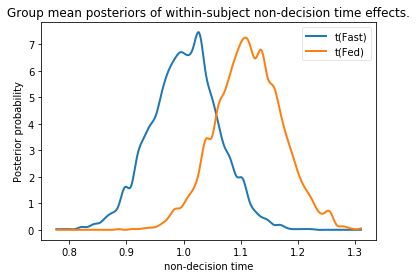

In [27]:
T_day_bias_Fast, T_day_bias_Fed = T_day_bias.nodes_db.node[["t(Fast)", "t(Fed)"]]
hddm.analyze.plot_posterior_nodes([T_day_bias_Fast, T_day_bias_Fed])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject non-decision time effects.')
plt.savefig('T_hddm_NonDec_Drink_Diff.pdf')

In [11]:
print "P(AVT_day_bias_t_Fast < AVT_day_bias_t_Fed) = ", (AVT_day_bias_t_Fast.trace() < AVT_day_bias_t_Fed.trace()).mean()

print "P(AVT_day_bias_v_Fast < AVT_day_bias_v_Fed) = ", (AVT_day_bias_v_Fast.trace() < AVT_day_bias_v_Fed.trace()).mean()
 
print "P(AVT_day_bias_a_Fast < AVT_day_bias_a_Fed) = ", (AVT_day_bias_a_Fast.trace() < AVT_day_bias_a_Fed.trace()).mean()

print "P(AT_day_bias_t_Fast < AT_day_bias_t_Fed) = ", (AT_day_bias_t_Fast.trace() < AT_day_bias_t_Fed.trace()).mean()
                                                                                             
print "P(AT_day_bias_a_Fast < AT_day_bias_a_Fed) = ", (AT_day_bias_a_Fast.trace() < AT_day_bias_a_Fed.trace()).mean()

print "P(T_day_bias_Fast < T_day_bias_Fed) = ", (T_day_bias_Fast.trace() < T_day_bias_Fed.trace()).mean()

P(AVT_day_bias_t_Fast < AVT_day_bias_t_Fed) =  0.895428571429
P(AVT_day_bias_v_Fast < AVT_day_bias_v_Fed) =  0.446
P(AVT_day_bias_a_Fast < AVT_day_bias_a_Fed) =  0.723428571429
P(AT_day_bias_t_Fast < AT_day_bias_t_Fed) =  0.900857142857
P(AT_day_bias_a_Fast < AT_day_bias_a_Fed) =  0.716
P(T_day_bias_Fast < T_day_bias_Fed) =  0.91


# Generate Posterior Predictive data

In [12]:
ppc_AT_day_bias = hddm.utils.post_pred_gen(AT_day_bias)

 [------------------107%-------------------] 41 of 38 complete in 456.9 sec

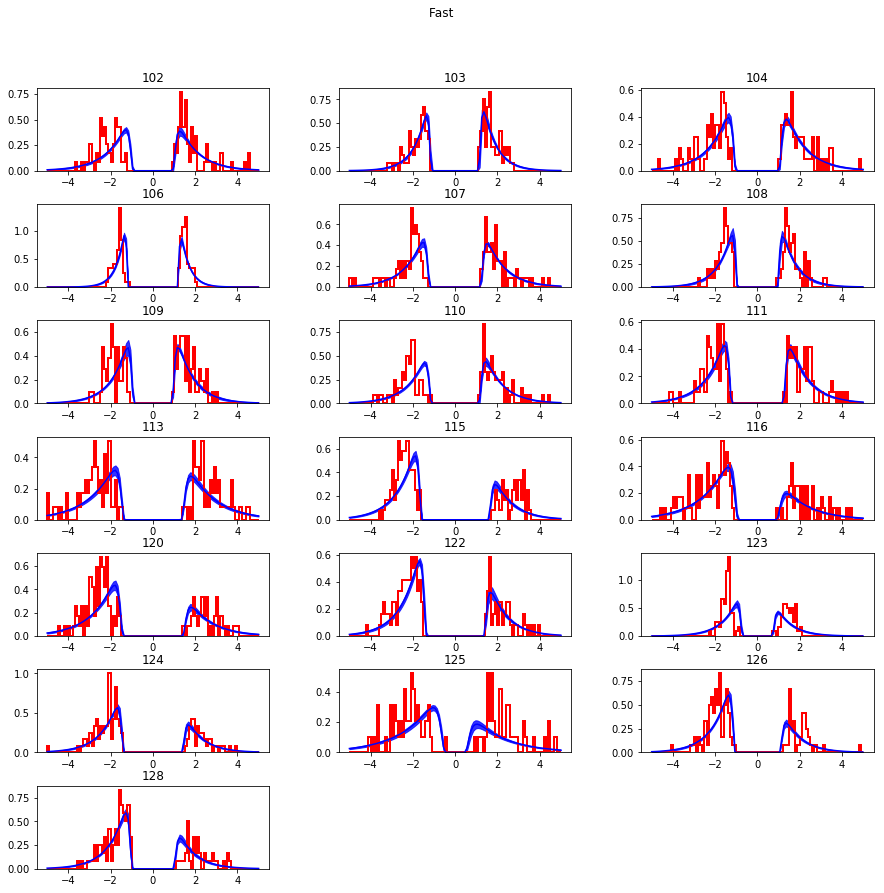

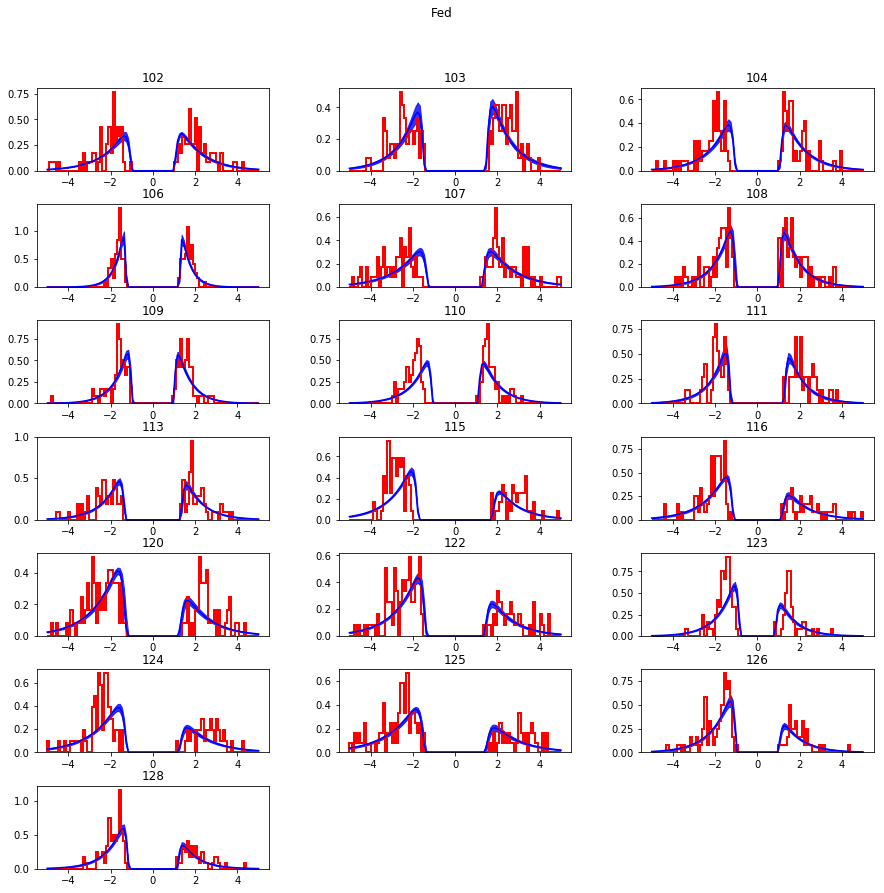

In [13]:
AT_day.plot_posterior_predictive(figsize=(15,14),save=True,path='/Users/james/Documents/NeuroEcon_of_Hunger/HDDM/AT/')

In [14]:
ppc_AVT_day_bias = hddm.utils.post_pred_gen(AVT_day_bias)

 [------------------107%-------------------] 41 of 38 complete in 393.1 sec

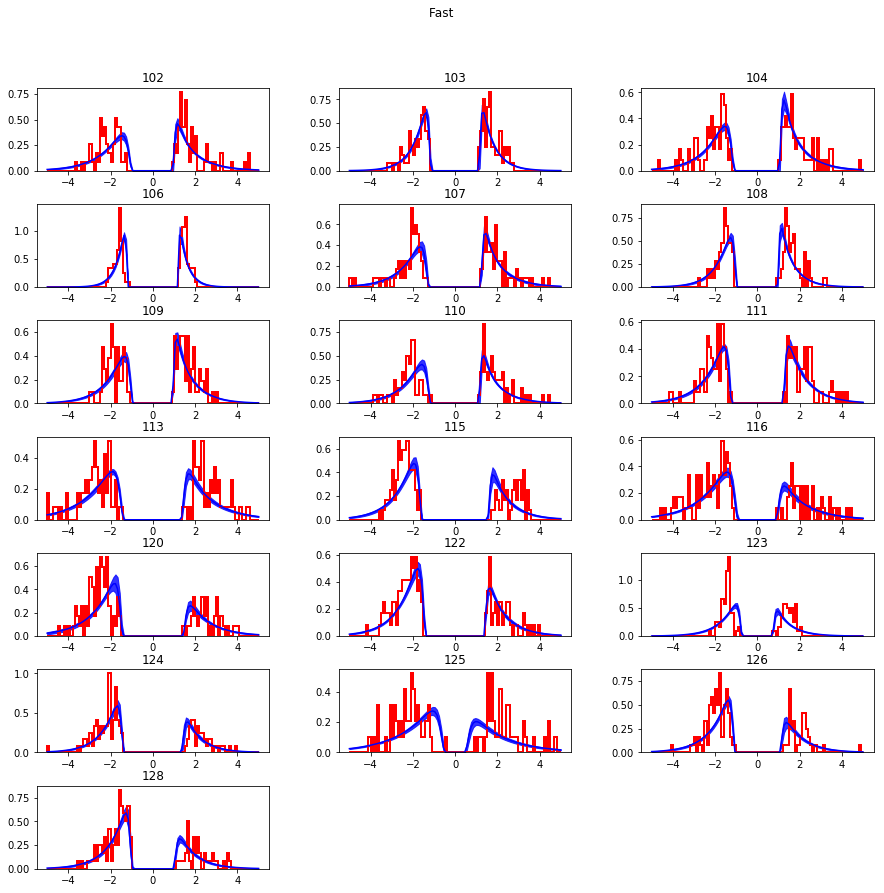

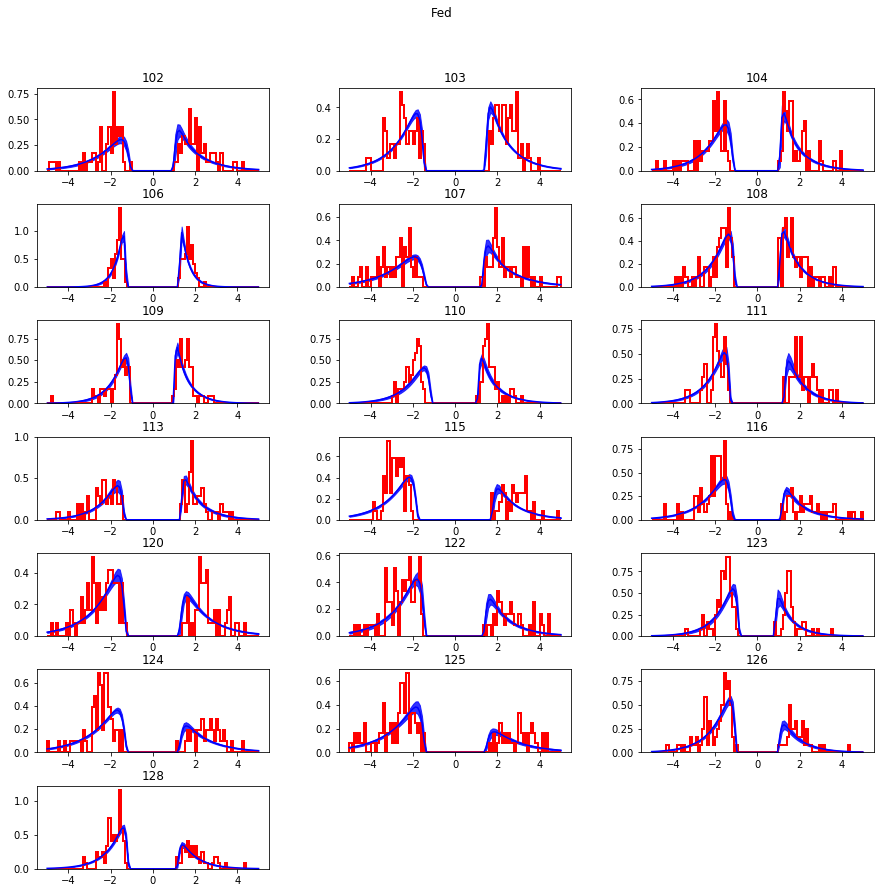

In [15]:
AVT_day_bias.plot_posterior_predictive(figsize=(15,14),save=True,path='/Users/james/Documents/NeuroEcon_of_Hunger/HDDM/AVT/')

In [16]:
ppc_T_day_bias = hddm.utils.post_pred_gen(T_day_bias)

 [------------------107%-------------------] 41 of 38 complete in 393.9 sec

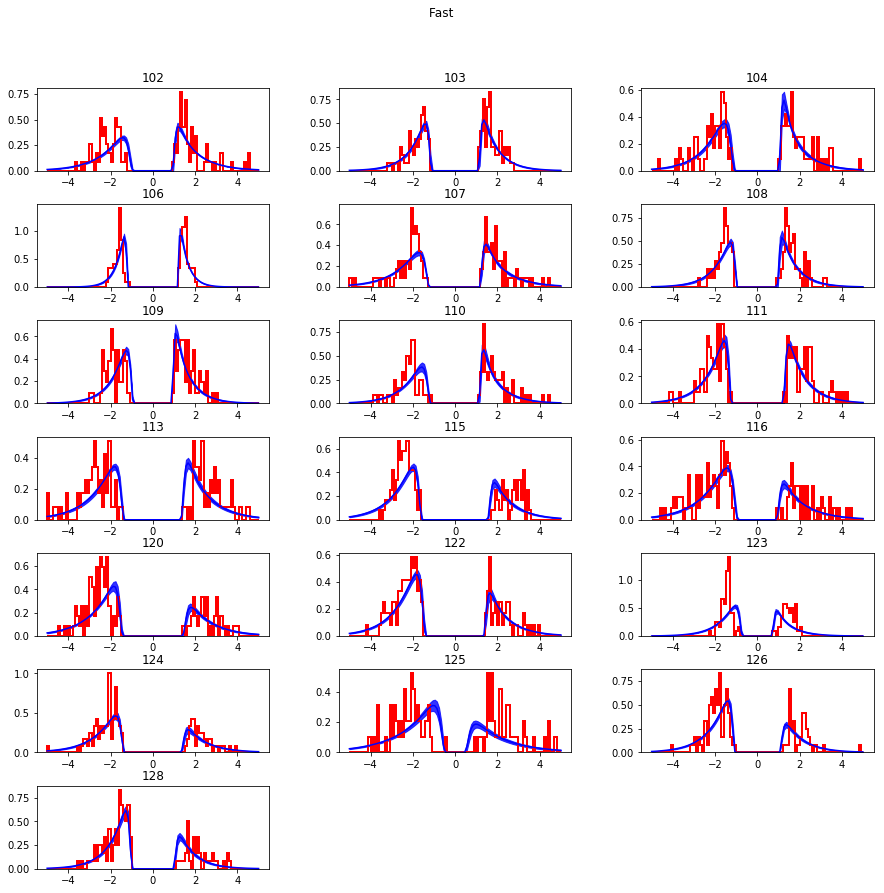

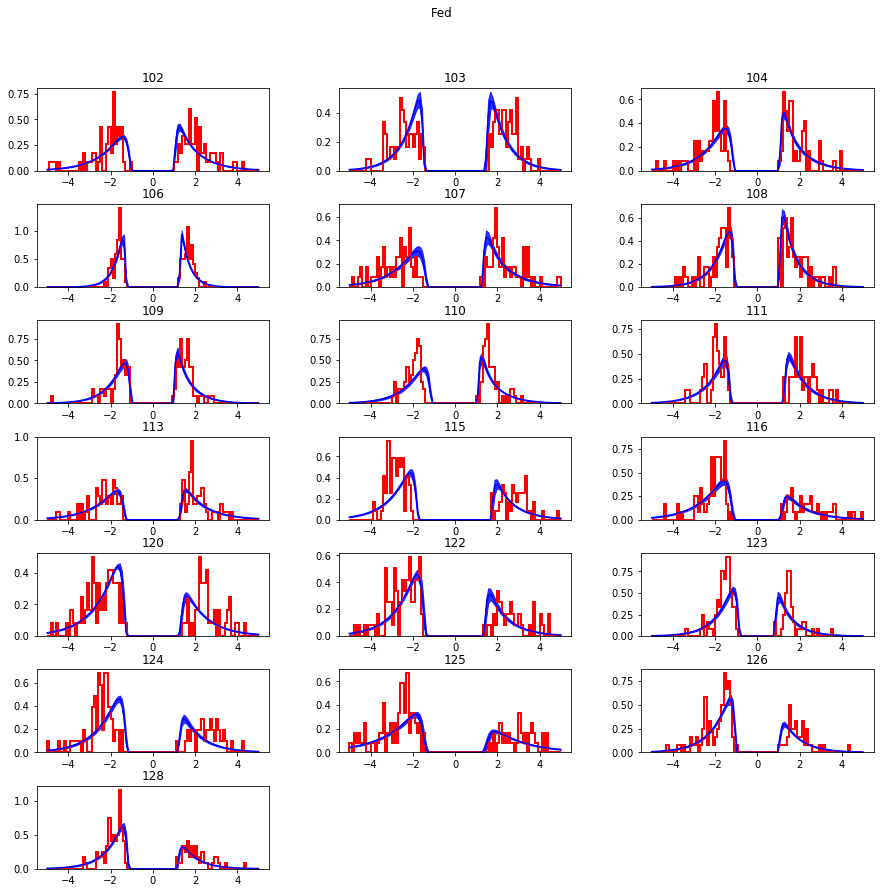

In [17]:
T_day_bias.plot_posterior_predictive(figsize=(15,14),save=True,path='/Users/james/Documents/NeuroEcon_of_Hunger/HDDM/T/')

# See how each of the models predictions compares with real data

In [18]:
compare_ppc_T_day_bias = hddm.utils.post_pred_stats(data2, ppc_T_day_bias)
#compare the values given from this to the values you see above
print compare_ppc_T_day_bias

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.433855  0.426815  0.085983  0.000050  0.007443     True   
mean_ub   2.109723  2.119062  0.364303  0.000087  0.132804     True   
std_ub    0.742860  0.834184  0.224056  0.008340  0.058541     True   
10q_ub    1.338300  1.353348  0.249426  0.000226  0.062440     True   
30q_ub    1.616300  1.578317  0.282399  0.001443  0.081192     True   
50q_ub    1.926500  1.864219  0.337579  0.003879  0.117839     True   
70q_ub    2.360700  2.302210  0.433988  0.003421  0.191766     True   
90q_ub    3.199800  3.215960  0.662121  0.000261  0.438665     True   
mean_lb  -2.183187 -2.250399  0.368076  0.004517  0.139997     True   
std_lb    0.716225  0.859979  0.210213  0.020665  0.064855     True   
10q_lb    1.424000  1.430822  0.251766  0.000047  0.063433     True   
30q_lb    1.708400  1.693888  0.285155  0.000211  0.081524     True   
50q_lb

In [20]:
compare_ppc_AVT_day_bias = hddm.utils.post_pred_stats(data2, ppc_AVT_day_bias)
#compare the values given from this to the values you see above
print compare_ppc_AVT_day_bias

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.433855  0.427401  0.081751  0.000042  0.006725     True   
mean_ub   2.109723  2.122304  0.373887  0.000158  0.139950     True   
std_ub    0.742860  0.834542  0.235048  0.008406  0.063653     True   
10q_ub    1.338300  1.356147  0.252644  0.000319  0.064148     True   
30q_ub    1.616300  1.580576  0.285906  0.001276  0.083019     True   
50q_ub    1.926500  1.867043  0.342722  0.003535  0.120994     True   
70q_ub    2.360700  2.307119  0.447772  0.002871  0.203371     True   
90q_ub    3.199800  3.220793  0.691095  0.000441  0.478053     True   
mean_lb  -2.183187 -2.253208  0.376608  0.004903  0.146737     True   
std_lb    0.716225  0.857353  0.222100  0.019917  0.069246     True   
10q_lb    1.424000  1.434300  0.251141  0.000106  0.063178     True   
30q_lb    1.708400  1.697246  0.286276  0.000124  0.082079     True   
50q_lb

In [21]:
compare_ppc_AT_day_bias = hddm.utils.post_pred_stats(data2, ppc_AT_day_bias)
#compare the values given from this to the values you see above
print compare_ppc_AT_day_bias

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.433855  0.427400  0.086474  0.000042  0.007519     True   
mean_ub   2.109723  2.118600  0.370360  0.000079  0.137245     True   
std_ub    0.742860  0.830923  0.232659  0.007755  0.061885     True   
10q_ub    1.338300  1.355297  0.250264  0.000289  0.062921     True   
30q_ub    1.616300  1.578254  0.282185  0.001448  0.081076     True   
50q_ub    1.926500  1.865192  0.340518  0.003759  0.119711     True   
70q_ub    2.360700  2.302893  0.443540  0.003342  0.200069     True   
90q_ub    3.199800  3.213255  0.684618  0.000181  0.468882     True   
mean_lb  -2.183187 -2.247912  0.375186  0.004189  0.144954     True   
std_lb    0.716225  0.852783  0.219420  0.018648  0.066793     True   
10q_lb    1.424000  1.433243  0.251546  0.000085  0.063361     True   
30q_lb    1.708400  1.695110  0.286630  0.000177  0.082333     True   
50q_lb

In [22]:
ppc_T_day_bias_stats = hddm.utils.post_pred_stats(data2, ppc_T_day_bias, call_compare=False)
print ppc_T_day_bias_stats.head()

                  accuracy   mean_ub    std_ub    10q_ub    30q_ub    50q_ub  \
wfpt(Fast).102 0  0.431034  2.169927  1.039675  1.167775  1.595805  1.845805   
               1  0.534483  1.990345  0.776474  1.226947  1.442267  1.825547   
               2  0.551724  1.902175  0.911791  1.177267  1.386947  1.626847   
               3  0.560345  1.887498  0.810705  1.154917  1.296877  1.623497   
               4  0.456897  2.173661  0.961704  1.295144  1.511284  1.960884   

                    70q_ub    90q_ub   mean_lb    std_lb    10q_lb    30q_lb  \
wfpt(Fast).102 0  2.235574  3.769785 -2.317862  1.066637  1.326005  1.646855   
               1  2.211637  3.015447 -2.215076  1.062651  1.372107  1.574517   
               2  2.032877  2.825637 -1.958868  0.647719  1.212307  1.525397   
               3  2.150017  3.025797 -2.521807  1.028865  1.276897  1.832397   
               4  2.303884  3.438664 -2.201948  1.025503  1.312444  1.526504   

                    50q_lb    70q_lb  

In [28]:
ppc_AT_day_bias_stats = hddm.utils.post_pred_stats(data2, ppc_AT_day_bias, call_compare=False)
print ppc_AT_day_bias_stats.head()

                  accuracy   mean_ub    std_ub    10q_ub    30q_ub    50q_ub  \
wfpt(Fast).102 0  0.568965  1.921369  0.783490  1.217016  1.418916  1.672266   
               1  0.517241  2.006435  0.860469  1.244467  1.433447  1.700207   
               2  0.525862  2.009238  1.025202  1.126519  1.383719  1.633519   
               3  0.387931  1.863025  0.843478  1.152970  1.365810  1.583990   
               4  0.525862  2.136927  0.989538  1.125529  1.411329  1.827529   

                    70q_ub    90q_ub   mean_lb    std_lb    10q_lb    30q_lb  \
wfpt(Fast).102 0  2.060416  3.016716 -2.382738  1.134603  1.329126  1.568436   
               1  2.119377  3.256687 -1.987162  0.842946  1.313507  1.495557   
               2  2.144119  3.275019 -2.167688  0.971672  1.288659  1.564599   
               3  2.068390  2.691470 -2.149920  0.758271  1.286290  1.673390   
               4  2.573329  3.718829 -2.322927  0.923453  1.363289  1.732589   

                    50q_lb    70q_lb  

In [29]:
ppc_AVT_day_bias_stats = hddm.utils.post_pred_stats(data2, ppc_AVT_day_bias, call_compare=False)
print ppc_AVT_day_bias_stats.head()

                  accuracy   mean_ub    std_ub    10q_ub    30q_ub    50q_ub  \
wfpt(Fast).102 0  0.586207  1.930725  0.780387  1.198638  1.440168  1.687208   
               1  0.422414  1.678563  0.689039  1.101165  1.285745  1.423065   
               2  0.465517  2.002736  0.827503  1.170018  1.380528  1.737568   
               3  0.491379  1.971550  0.981203  1.178923  1.406303  1.608143   
               4  0.474138  1.890488  0.868581  1.105708  1.311808  1.642268   

                    70q_ub    90q_ub   mean_lb    std_lb    10q_lb    30q_lb  \
wfpt(Fast).102 0  2.037298  3.109538 -2.110533  0.905835  1.262948  1.565798   
               1  1.896505  2.419805 -2.085021  0.997539  1.279805  1.476865   
               2  2.278568  3.334458 -2.249200  0.941093  1.335308  1.617638   
               3  2.022323  3.219163 -2.302487  0.974131  1.388983  1.652843   
               4  2.038768  3.001248 -2.257279  1.148453  1.197868  1.587268   

                    50q_lb    70q_lb  